# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


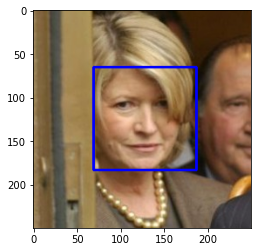

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [5]:
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# Passing a numpy array to a function
# Source: https://stackoverflow.com/questions/52118745/pass-numpy-array-as-function-argument

# Test on human_files_short
humans = np.array([face_detector(file) for file in human_files_short])
perc_h = 100*np.sum(humans)/len(human_files_short)

# Test on dog_files_short
dogs = np.array([face_detector(file) for file in dog_files_short])
perc_d = 100*np.sum(dogs)/len(dog_files_short)

# Results
print('Percentage of human faces detected in the first 100 images in human_files: {}'.format(perc_h))
print('Percentage of human faces detected in the first 100 images in dog_files: {}'.format(perc_d))

Percentage of human faces detected in the first 100 images in human_files: 99.0
Percentage of human faces detected in the first 100 images in dog_files: 12.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### Testing the performance of the Multi-Task Cascaded Convolutional Neural Network (MTCNN)

In [6]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

# SOURCE CODE: https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

# Installing Required Libraries
!pip install mtcnn
!pip install tensorflow

In [7]:
# Printing out MTCNN version
import mtcnn
print(mtcnn.__version__)

0.1.0


### Human Face Detector Code
MTCNN stores the attributes of any faces in a list, as it can be seen from the example below, which has 8 faces.

In [8]:
from mtcnn.mtcnn import MTCNN

filename = "images/group_of_people.jpg"

# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    # for each face, draw a rectangle based on coordinates
    for face in result_list:
        x, y, width, height = face['box']
        face_border = plt.Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

data = plt.imread(filename)
detector = mtcnn.MTCNN()
faces = detector.detect_faces(data)

Attributes:

[{'box': [390, 59, 49, 65], 'confidence': 1.0, 'keypoints': {'left_eye': (405, 81), 'right_eye': (428, 84), 'nose': (417, 94), 'mouth_left': (402, 104), 'mouth_right': (425, 107)}}, {'box': [146, 105, 42, 57], 'confidence': 0.9999904632568359, 'keypoints': {'left_eye': (157, 126), 'right_eye': (177, 128), 'nose': (167, 138), 'mouth_left': (156, 145), 'mouth_right': (176, 146)}}, {'box': [177, 56, 44, 55], 'confidence': 0.9999825954437256, 'keypoints': {'left_eye': (191, 76), 'right_eye': (211, 77), 'nose': (202, 88), 'mouth_left': (190, 95), 'mouth_right': (211, 96)}}, {'box': [36, 34, 46, 62], 'confidence': 0.9999793767929077, 'keypoints': {'left_eye': (53, 58), 'right_eye': (74, 60), 'nose': (64, 71), 'mouth_left': (49, 76), 'mouth_right': (72, 79)}}, {'box': [251, 84, 43, 55], 'confidence': 0.999962329864502, 'keypoints': {'left_eye': (259, 108), 'right_eye': (277, 103), 'nose': (268, 117), 'mouth_left': (263, 126), 'mouth_right': (282, 121)}}, {'box': [84, 120, 47, 64]

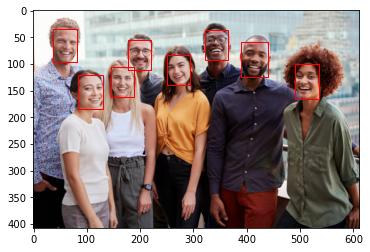

In [9]:
print("Attributes:\n")
print(faces)
print("\nFaces highlighted:")
draw_facebox(filename, faces)

### Face detector function
A simple code that reads the result list after running the code over an image, if there are any attributes stored, there is a face detected.

In [10]:
# returns "True" if face is detected in image stored at img_path
def face_detector_MTCNN(img_path):
    data = plt.imread(img_path)
    detector = mtcnn.MTCNN()
    faces = detector.detect_faces(data)
    if len(faces) > 0:
        return 1
    else:
        return 0

In [12]:
# Testing face_detector_MTCNN in a human image
is_human = face_detector_MTCNN(human_files[0])

# Testing face_detector_MTCNN in a dog image
is_dog = face_detector_MTCNN(dog_files[0])

print('Face detected in a human image: {}'.format(is_human))
print('Face detected in a dog image: {}'.format(is_dog))

Face detected in a human image: 1
Face detected in a dog image: 0


### Checking MTCNN performance

In [13]:
# Test on human_files_short
MTCNNhumans = np.array([face_detector_MTCNN(file) for file in human_files_short])
MTCNNperc_h = 100*np.sum(MTCNNhumans)/len(human_files_short)

# Test on dog_files_short
MTCNNdogs = np.array([face_detector_MTCNN(file) for file in dog_files_short])
MTCNNperc_d = 100*np.sum(MTCNNdogs)/len(dog_files_short)

# Results
print('Percentage of human faces detected in the first 100 images in human_files: {}'.format(MTCNNperc_h))
print('Percentage of human faces detected in the first 100 images in dog_files: {}'.format(MTCNNperc_d))

Percentage of human faces detected in the first 100 images in human_files: 100.0
Percentage of human faces detected in the first 100 images in dog_files: 27.0


### Comparative Table

In [14]:
from tabulate import tabulate
print(tabulate([['OpenCV', 'Humans', perc_h], ['OpenCV', 'Dogs', perc_d], ['MTCNN', 'Humans', MTCNNperc_h], ['MTCNN', 'Dogs', MTCNNperc_d]], headers=['Algorithm', 'Image Type', '%']))

Algorithm    Image Type      %
-----------  ------------  ---
OpenCV       Humans         99
OpenCV       Dogs           12
MTCNN        Humans        100
MTCNN        Dogs           27


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [15]:
# Steps required to prevent errors in the next cell: "No module named 'torch'"
!pip install --no-cache-dir install torch
!pip install --no-cache-dir install torchvision

In [16]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](https://pytorch.org/vision/stable/models.html).

In [17]:
from PIL import Image
import torchvision.transforms as transforms

from torch.autograd import Variable

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Predict function
def VGG16_predict(img_path):

    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load the image
    img = Image.open(img_path)
    
    # Normalize image
    normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
    
    # Resize to a size accepted by VGG16 model
    preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    
    # Image tensor
    img_tensor = preprocess(img).float()
    
    # Add a new dimention
    img_tensor.unsqueeze_(0)
    
    # Convert tensor to a Pytorch Variable
    img_tensor = Variable(img_tensor)
    
    # Check cuda availability
    if use_cuda:
        img_tensor = Variable(img_tensor.cuda())
    
    
    VGG16.eval()
    
    # Output tensor
    output = VGG16(img_tensor) 
    output = output.cpu()
    
    # Get the class label with the biggest value
    predict_index = output.data.numpy().argmax() 
    
    # Return predicted index
    return predict_index

In [19]:
# Testing the funcion on a dog image:
index = VGG16_predict(dog_files[0])
print(index)

207


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [20]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    index = VGG16_predict(img_path)
    
    if ((index >= 151) & (index <= 268)):
        # True -> Dog class found
        return 1

    else:
        # False -> Didn't found a dog class
        return 0

In [21]:
# Test on a dog image:
is_dog = dog_detector(dog_files[2])

# Test on a human image:
is_human = dog_detector(human_files[2])

print('Dog class detected in a dog image: {}'.format(is_dog))
print('Dog class detected in a human image: {}'.format(is_human))

Dog class detected in a dog image: 1
Dog class detected in a human image: 0


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [22]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# Test on human_files_short
DDhumans = np.array([dog_detector(file) for file in human_files_short])
ddperc_h = 100*np.sum(DDhumans)/len(human_files_short)

# Test on dog_files_short
DDdogs = np.array([dog_detector(file) for file in dog_files_short])
ddperc_d = 100*np.sum(DDdogs)/len(dog_files_short)

print('Percentage of human faces detected in the first 100 images in human_files: {}'.format(ddperc_h))
print('Percentage of human faces detected in the first 100 images in dog_files: {}'.format(ddperc_d))

Percentage of human faces detected in the first 100 images in human_files: 0.0
Percentage of human faces detected in the first 100 images in dog_files: 100.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### Testing the eficiency of ResNet-50 pre-trained network

In [23]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# Installing the packages
!pip install keras.applications

In [24]:
# Source code: https://towardsdatascience.com/dog-breed-classification-using-cnns-and-transfer-learning-e36259b29925

from keras.applications.resnet import ResNet50, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

def dog_detector_RESNET50(img_path):
    
    # Create a Redidual-network already trained in the IMAGENET
    ResNet50_model = ResNet50(weights='imagenet')

    # Load the image in the size expected by the ResNet50_model
    img = load_img(img_path, target_size=(224, 224))

    # Transform the image into an array
    preimg_array = img_to_array(img)
    img_array = np.expand_dims(preimg_array, axis=0)

    # Pre-process the image according to IMAGENET standarts
    img_ready = preprocess_input(img_array)

    # Predicts
    probs = ResNet50_model.predict(img_ready)

    # Find the position with the maximum probability value
    position_of_max = np.argmax(probs)

    # Verify if the position of max corresponds to a dog class
    dog_class = ((position_of_max >= 151) & (position_of_max <= 268))
    
    if dog_class == True:
        return 1
    else:
        return 0

In [25]:
# Testing the function on individual images

is_dog = dog_detector_RESNET50(dog_files[4])
is_human = dog_detector_RESNET50(human_files[5])

print('ResNet50 Dog_detector() output from a dog image: {}'.format(is_dog))
print('ResNet50 Dog_detector() output from a human image: {}'.format(is_human))

ResNet50 Dog_detector() output from a dog image: 1
ResNet50 Dog_detector() output from a human image: 0


In [26]:
### Testing the performance of the ResNet50 dog_detector function on the images in human_files_short and dog_files_short.

# Human_files_short
RNhumans = np.array([dog_detector_RESNET50(file) for file in human_files_short])
RNperc_h = 100*np.sum(RNhumans)/len(human_files_short)

# Test on dog_files_short

RNdogs = np.array([dog_detector_RESNET50(file) for file in dog_files_short])
RNperc_d = 100*np.sum(RNdogs)/len(dog_files_short)

print('Percentage of dogs detected in the images in dog_files_short: {}'.format(RNperc_d))
print('Percentage of dogs detected in the images in human_files_short: {}'.format(RNperc_h))

Percentage of dogs detected in the images in dog_files_short: 100.0
Percentage of dogs detected in the images in human_files_short: 0.0


### Comparative Table

In [27]:
print(tabulate([['VGG16', 'Humans', ddperc_h], ['VGG16', 'Dogs', ddperc_d], ['RESNET50','Humans',RNperc_h], ['RESNET50','Dogs',RNperc_d]], headers=['Model', 'Image Type', '% of dog faces']))

Model     Image Type      % of dog faces
--------  ------------  ----------------
VGG16     Humans                       0
VGG16     Dogs                       100
RESNET50  Humans                       0
RESNET50  Dogs                       100


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [28]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Check cuda availability
use_cuda = torch.cuda.is_available()

# Data preprocess dict
data_preprocess  = { 
    
    # Source: https://pytorch.org/vision/stable/transforms.html
    #
    # Train dataset:
    # Transforms Compose - Composes several transforms together
    # Source: https://pytorch.org/vision/stable/transforms.html
    # 
    # Random Resized Crop(224) - Crop a random portion of image and resize it to 224x224
    # Random Horizontal Flip() - Horizontally flip the given image randomly with a given probability (Data augmentation)
    # Random Rotation (15) - Rotate the image by angle of 15° (Data augmentation)
    # To Tensor() - Convert a PIL Image or numpy.ndarray to tensor
    # Normalize a float tensor image with mean and standard deviation
    #
    # What numbers select to transforms.Normalize? 
    # Source: https://stackoverflow.com/questions/65467621/what-are-the-numbers-in-torch-transforms-normalize-and-how-to-select-them
    
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), 
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    
    # Valid dataset:
    # Transforms Compose - Composes several transforms together
    # 
    # Random Resize(256) - Resize the input image to the given size
    # Center Crop (224) - Crops the given image at the center with the given size
    # To Tensor() - Convert a PIL Image or numpy.ndarray to tensor
    # Normalize a float tensor image with mean and standard deviation
    
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    
    # Test dataset:
    # Transforms Compose - Composes several transforms together
    # 
    # Random Resize(256) - Resize the input image to the given size
    # Center Crop (224) - Crops the given image at the center with the given size
    # To Tensor() - Convert a PIL Image or numpy.ndarray to tensor
    # Normalize a float tensor image with mean and standard deviation
    
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    
}

path = "dogImages/"

# Load all pre-processed images
images = {x: datasets.ImageFolder(os.path.join(path, x), data_preprocess[x]) 
          for x in ['train', 'valid', 'test']}

# PyTorch data loading utility has the torch.utils.data.DataLoader class. 
# It represents a Python iterable over a dataset, and it's used to iterate over a dataset
# Source: https://pytorch.org/docs/stable/data.html
dataloaders = {x: torch.utils.data.DataLoader(images[x], batch_size = 20, shuffle = True, num_workers = 0) 
                for x in ['train', 'valid', 'test']}

# Lenght of the datasets (train, valid and test)
sizes = {x: len(images[x]) for x in ['train', 'valid', 'test']}

print('Train images: {}'.format(sizes['train']))
print('Valid images: {}'.format(sizes['valid']))
print('Test images: {}'.format(sizes['test']))

Train images: 6680
Valid images: 835
Test images: 836


In [29]:
# Get all class names (from train class)
names = images['train'].classes
clean_names = []

# Get rid of the numbers and the "_"
for name in names:
    clean_names.append(name[4:].replace('_', ' '))

# Number of classes
n_classes = len(clean_names)

# Print Sample of classes:
for i in range(5):
    print (clean_names[i])

Affenpinscher
Afghan hound
Airedale terrier
Akita
Alaskan malamute


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

**- Resizing is done by applying RandomResizedCrop(224) to train images and applying Resize(256) and CenterCrop(224) to valid and test images, at the end, all images will be resized to 224 x 224, this is necessary because it's how the model accepts the tensors.**

**- I decided to only to augmentation on the train dataset by using a Random Crop, a Random Horizontal Flip and a Random Rotation.**

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [30]:
import torch.nn as nn
import torch.nn.functional as F

# Source: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

# define the CNN architecture
class Net(nn.Module):
    
    ### TODO: choose an architecture, and complete the class
    
    # Definition of the constructor
    def __init__(self):
        
        super(Net, self).__init__()
        
        # Convolutional Layers
        # Sources: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        #          https://androidkt.com/use-the-batchnorm-layer-in-pytorch/
        #
        # 5 Convolutional Layers and 6 BatchNorm Layers 
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv_bn1 = nn.BatchNorm2d(224,3)
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv_bn2 = nn.BatchNorm2d(16)
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv_bn3 = nn.BatchNorm2d(32)
        
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1) 
        self.conv_bn4 = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv_bn5 = nn.BatchNorm2d(128)
        
        self.conv_bn6 = nn.BatchNorm2d(256)
        
        # Pooling Layer
        # Source: https://deeplizard.com/learn/video/ZjM_XQa5s6s
        #
        # Max pooling is a type of operation that is typically added to CNNs following individual convolutional layers.
        # When added to a model, max pooling reduces the dimensionality of images by reducing the number of pixels 
        # in the output from the previous convolutional layer.
        self.pool = nn.MaxPool2d(2, 2)
        
        # Dropout Layer
        # Source: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
        #
        # Dropout is a technique used to prevent a model from overfitting
        self.dropout = nn.Dropout(0.5)
        
        # Fully Connected Layers
        # Sources: https://stackoverflow.com/questions/56660546/how-to-select-parameters-for-nn-linear-layer-while-training-a-cnn
        #          https://pythonprogramming.net/building-deep-learning-neural-network-pytorch/  
        #
        # Fully Connected layers in a neural networks are those layers where all the inputs from one layer are connected 
        # to every activation unit of the next layer
        self.fc1 = nn.Linear(256*7*7, 512)
        self.fc2 = nn.Linear(512, n_classes)
    
    # Definition of the forward function
    def forward(self, x):
        
        # Apply the activation function (relu) to each layer
        # Relu Conv Layer 1
        x = self.pool(F.relu(self.conv1(x)))
        
        # Relu Conv Layer 2
        x = self.conv_bn2(x)
        x = self.pool(F.relu(self.conv2(x)))
        
        # Relu Conv Layer 3
        x = self.conv_bn3(x)
        x = self.pool(F.relu(self.conv3(x)))
        
        # Relu Conv Layer 4
        x = self.conv_bn4(x)
        x = self.pool(F.relu(self.conv4(x)))
        
        # Relu Conv Layer 5
        x = self.conv_bn5(x)
        x = self.pool(F.relu(self.conv5(x)))
        
        x = self.conv_bn6(x)
        
        # Apply view function
        # Avoids explicit data copy, thus allows us to do fast and memory efficient reshaping, 
        # slicing and element-wise operations.
        # Source: https://pytorch.org/docs/stable/tensor_view.html
        x = x.view(-1, 256 * 7 * 7)
        
        # Add dropout layer
        x = self.dropout(x)
        
        # Pass the first fully connected layer forward to the second
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        # Return output
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

**The Constructor:**

**Convolutional Layers - Five layers defined with respective 16, 32, 64, 128 and 256 filters, and all of them have kernel size = 3, stride = 1 and padding = 1.**

**Pooling Layer - I picked method MaxPooling2D for the pooling layer. When added to a model, max pooling reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.**

**Dropout Layer - Dropout Layer with a probability of 2% to prevent overfitting**

**Fully Connected Layers - 2 fully connected layers, the first has a 256 input, and output to 512, which is the input to the second FC layer, and its output is the number of classes n_classes.**

**Forward Function:**

**A Relu activation function is applied to each layer to make the network non-linear**

**The view function is applyed to prevent explicit data copy**

**Connect the FC layers**

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [31]:
import torch.optim as optim

### TODO: select loss function
# Source: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# Source: https://pytorch.org/docs/stable/optim.html
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [32]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
import time
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    since = time.time()
    
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # zero grad
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            
            # batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # optimization step
            optimizer.step()
            
            # training loss
            train_loss = train_loss + (1 / (batch_idx + 1)) * (loss.data - train_loss)
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
             # forward pass
            output = model(data)
            
            # batch loss
            loss = criterion(output, target)
            
            # average validation loss 
            valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)
        
        # Training Data
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            print('Validation Loss decreased! Model saved.')
    
    # Elapsed training time
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    
    # return trained model
    return model

### Observation:
**In order to be able to use the MTCNN model and the ResNet50 model in previous examples, I had to git clone this repository and open a notebook outside of Udacity's GPU supported workbench. For reasons unbeknownst to me, this external packages would not be installed in that environment, but here I was able to get it to work. Unfortunately, since there is no GPU support here where I'm working, training this model is extremely slow, and the AWS server keeps disconecting, making me lose a lot of time. Therefore, I decided to train only a few epochs just to be able to run the cell, and I'm going to load a different 'model_scratch100.pt' trained with 100 epochs in a GPU environment to test the model.**

In [31]:
# train the model
loaders_scratch = dataloaders

# Trained model_scratch with only 3 epochs
model_scratch = train(3, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.711918 	Validation Loss: 4.357176
Validation Loss decreased! Model saved.
Epoch: 2 	Training Loss: 4.425651 	Validation Loss: 4.116408
Validation Loss decreased! Model saved.
Epoch: 3 	Training Loss: 4.269604 	Validation Loss: 3.974433
Validation Loss decreased! Model saved.
Training complete in 25m 18s


In [32]:
# Loading a 100 epoch trained model_scratch
model_scratch.load_state_dict(torch.load('model_scratch100.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [39]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

In [34]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.487851


Test Accuracy: 43% (362/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [35]:
## TODO: Specify data loaders
# The same data loaders will be used in the train function next

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [33]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# Sources: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
#          https://pytorch.org/hub/pytorch_vision_densenet/
        
model_transfer = models.densenet161(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False
num_ftrs = model_transfer.classifier.in_features
model_transfer.classifier = nn.Linear(num_ftrs, n_classes)

if use_cuda:
    model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
**Honestly there isn't to much to add here, I was able this one to work and I was satisfied with the result. I know that ResNet50, InceptionV3 and Xception are other good picks, but I didn't try to compare them.**


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [36]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001, momentum=0.9)
loaders_transfer = dataloaders

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

### Observation:
***Using the same logic as the previous model, this one only has 1 epoch just to be able to run the cell, which is already extremely slow in this environment (about 2h running), and in the next cell I'll load a 100 epoch model trained in a GPU environment.***

In [38]:
# train the model
n_epochs = 1
loaders_transfer = dataloaders
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 4.058557 	Validation Loss: 2.852604
Validation Loss decreased! Model saved.
Training complete in 123m 41s


In [37]:
# Loading a 100 epoch trained model_transfer
model_transfer.load_state_dict(torch.load('model_transfer100.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [40]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.309930


Test Accuracy: 89% (750/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [65]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# Get all class names (from train class)
names = images['train'].classes

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # Load the image
    img = Image.open(img_path) 
        
    # Normalize image
    normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
    
    # Define preprocess with transforms.Compose, the same applyed to the dataset
    preprocess = transforms.Compose([transforms.Resize(224),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    normalize])
    
    img_tensor = preprocess(img).float()
    
    # Insert the new axis (extra dimension)
    img_tensor.unsqueeze_(0)  
    
    # Convert image to tensor
    img_tensor = Variable(img_tensor)
    
    if use_cuda:
        img_tensor = Variable(img_tensor.cuda())        
    
    model_transfer.eval()
    
    output = model_transfer(img_tensor) 
    output = output.cpu()
    
    # Get the prediction index
    predicted_index = output.data.numpy().argmax() 
    
    # Returns the predicted class
    return names[predicted_index]

In [66]:
# Testing the predict function:
for i in range(10):
    result = predict_breed_transfer(dog_files[i*15])
    print("Test file: {}".format(dog_files[i*15]))
    print("Predicted breed: {}".format(result))
    print("")

Test file: dogImages/valid/076.Golden_retriever/Golden_retriever_05245.jpg
Predicted breed: 076.Golden_retriever

Test file: dogImages/valid/044.Cane_corso/Cane_corso_03176.jpg
Predicted breed: 044.Cane_corso

Test file: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00847.jpg
Predicted breed: 012.Australian_shepherd

Test file: dogImages/valid/033.Bouvier_des_flandres/Bouvier_des_flandres_02356.jpg
Predicted breed: 033.Bouvier_des_flandres

Test file: dogImages/valid/003.Airedale_terrier/Airedale_terrier_00182.jpg
Predicted breed: 003.Airedale_terrier

Test file: dogImages/valid/026.Black_russian_terrier/Black_russian_terrier_01859.jpg
Predicted breed: 026.Black_russian_terrier

Test file: dogImages/valid/109.Norwegian_elkhound/Norwegian_elkhound_07178.jpg
Predicted breed: 109.Norwegian_elkhound

Test file: dogImages/valid/049.Chinese_crested/Chinese_crested_03504.jpg
Predicted breed: 049.Chinese_crested

Test file: dogImages/valid/042.Cairn_terrier/Cairn_terrier_02966.jp

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [53]:
!pip install mpimg

  Created wheel for mpimg: filename=mpimg-0.0.1-py3-none-any.whl size=1342 sha256=2c310d0985021311207427214698b7123655a3e1404ed87b4d2095e8bbf10485
  Stored in directory: /home/ec2-user/.cache/pip/wheels/98/6d/d0/62e9accebbe23fb9a4cc4633fbeee1988be6e1434191b75f49
Successfully built mpimg


In [85]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import random

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    is_dog = dog_detector(img_path)
    is_human = face_detector(img_path)
    prediction = predict_breed_transfer(img_path)
    
    # Is it a dog?
    if(is_dog):
        
        # Say that it's a dog and show the image analysed
        print("Based on my knowledge I can definetely tell that this is a DOG")
        img = mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show()    
        
        # Give the predicted breed
        breed = prediction[4:].replace("_", " ")
        print("And to me it looks like a {}".format(breed))
        
        # Show a random sample image from the valid dataset
        path = '/'.join(['dogImages/valid', str(prediction)])
        pick = random.choice(os.listdir(path))
        sample_path = '/'.join([path, pick])
        sample_image = mpimg.imread(sample_path)
        sample_plot = plt.imshow(sample_image)
        
        plt.show() 
    
    # Is it a human?
    elif(is_human):
        
        # Say that it's a human and show the image analysed
        print("Based on my knowledge I can definetely tell that this is a HUMAN")
        img = mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show()    
        
        # Give the predicted breed
        breed = prediction[4:].replace("_", " ")
        print("And to me it looks like a {}".format(breed))
        
        # Show a random sample image from the valid dataset
        path = '/'.join(['dogImages/valid', str(prediction)])
        pick = random.choice(os.listdir(path))
        sample_path = '/'.join([path, pick])
        sample_image = mpimg.imread(sample_path)
        sample_plot = plt.imshow(sample_image)
        
        plt.show() 
    
    # No human or dog
    else:
        print("ERROR: I can't see a dog or a human on this image. Please try another one")
        img = mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show() 
        
    print("------------------------------------------------------------------")


Based on my knowledge I can definetely tell that this is a DOG


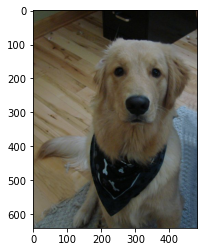

And to me it looks like a Golden retriever


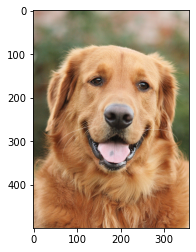

------------------------------------------------------------------


In [86]:
# Testing on dog
run_app(dog_files[0])

Based on my knowledge I can definetely tell that this is a HUMAN


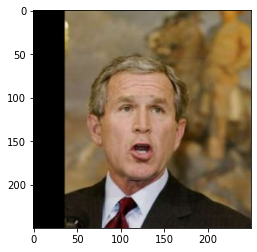

And to me it looks like a Irish wolfhound


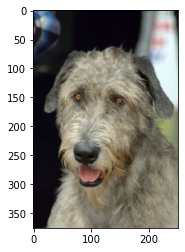

------------------------------------------------------------------


In [87]:
# Testing on human
run_app(human_files[345])

ERROR: I can't see a dog or a human on this image. Please try another one


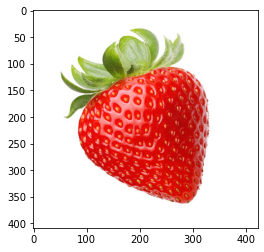

------------------------------------------------------------------


In [88]:
# Neither option
run_app("images/strawberry.jpg")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.


__Answer:__ **The outputs were exactly what I expected. I tried two mixed breed dogs, mine which has a strong presence of a German Shorthaired Pointer, and another one from a friend of mine which has a lot of a Labrador Retriever, and those were exactly the results I got. For my personal picture, it was rather humourous that the output was a curly haired dog because of my curly-ish hair, and a simular result happened with the random woman picture, making me believe that the hair has a strong weight in the model output. As for the other two images, I tried a cartoon dog and a cat, and the algorithm gave errors for both images. This makes sence, because the index returned by the VGG16 model for these two pictures are "comic book" and "tiger cat", which are correct, but ignored by my application.**

**Improvement points:**
**1) There are a few breeds not classified on this pretrained model which will give an error. For example, a picture of a Shiba Inu (japanese dog breed) will return index 273 - Canis Dingo, a type of australian wild canid, and since it's not within the index range accepted by the algorithm, it will give an error. So perhaps the usage of a different model with more classified breeds and a larger dataset would fix this problem.**

**2) I was able to get my model work with transfer learning from DenseNet161, which worked very well, but I wish to have tested with some other models for comparison. I know that ResNet50, InceptionV3 and Xception are interesting options, and maybe one of this models has an even better perfomance then DenseNet161.**

**3) I didn't make too many tests with the hyperparameters, I used the same values in the documentation examples, so I believe there is probably some better tuning to do.**

Based on my knowledge I can definetely tell that this is a DOG


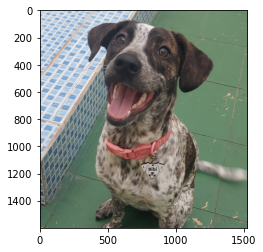

And to me it looks like a German shorthaired pointer


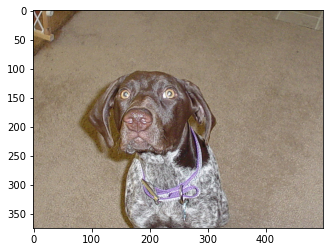

------------------------------------------------------------------
Based on my knowledge I can definetely tell that this is a HUMAN


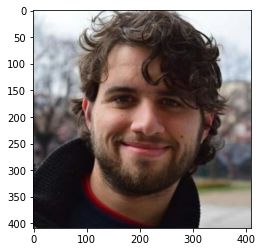

And to me it looks like a Curly-coated retriever


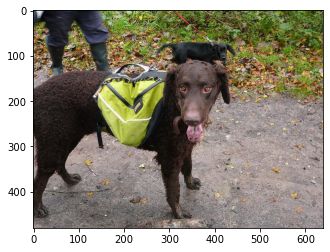

------------------------------------------------------------------
Based on my knowledge I can definetely tell that this is a DOG


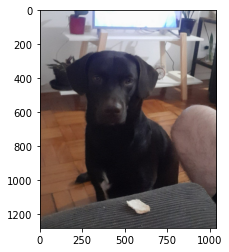

And to me it looks like a Labrador retriever


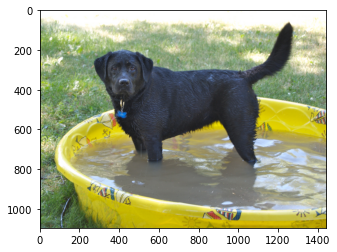

------------------------------------------------------------------
Based on my knowledge I can definetely tell that this is a HUMAN


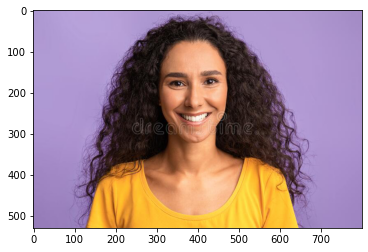

And to me it looks like a Havanese


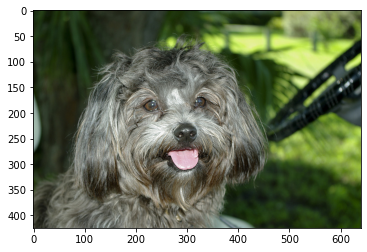

------------------------------------------------------------------
ERROR: I can't see a dog or a human on this image. Please try another one


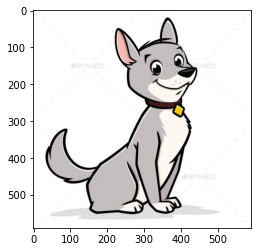

------------------------------------------------------------------
ERROR: I can't see a dog or a human on this image. Please try another one


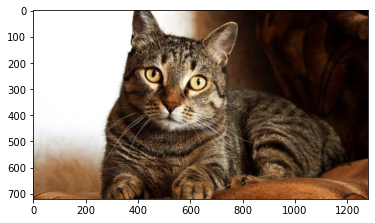

------------------------------------------------------------------


In [97]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

# A picture of my dog (a mixed breed that contains a lot of German Shoirthaired Pointer)
run_app("NewImages/MyDog.jpeg")

# A picture of myself :)
run_app("NewImages/Myself.jpg")

# A picture of my friend's dog (another mixed breed with a lot of Labrador Retriever)
run_app("NewImages/Otto.jpg")

# A picture from a googled random woman
run_app("NewImages/Woman.jpg")

# A picture of a cartoon dog
run_app("NewImages/CartoonDog.jpg")

# A picture of a cat
run_app("NewImages/Cat.jpg")

# Deploying the Model

To finish this project, I wrote a small flask application that runs the final algorithm, it is hosted on the following link:
http://andrevargas22.pythonanywhere.com/

It can be checked and tested by anyone.